In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from selectinf.Simulation.spline import b_spline
from selectinf.Simulation.spline_instance import generate_gaussian_instance_from_bspline_interaction, generate_gaussian_instance_nonlinear_interaction
from selectinf.group_lasso_query import (group_lasso,
                                         split_group_lasso)
from simulation_helpers import (naive_inference_inter, data_splitting_inter,
                                calculate_F1_score_interactions)

import regreg.api as rr
from selectinf.base import selected_targets
from selectinf.base import restricted_estimator
import scipy.stats
import statsmodels.api as sm
import sys

In [75]:
(design, data_interaction, Y, Y_mean, data_combined,
 groups, active, active_inter_adj, active_inter_list) \
    = generate_gaussian_instance_from_bspline_interaction(n=500, p_nl=20, p_l=0,
                                                          s_nl=5, s_l=5,
                                                          nknots=8, degree=3, SNR=1,
                                                          center=False, scale=True, 
                                                          random_signs=True,
                                                          intercept=False, structure='allpairs', s_interaction=5)

Equally spaced quantile knots used.
noise_sd: 0.2582413677215549


In [64]:
np.linalg.matrix_rank(design)

60

In [65]:
design.shape

(500, 60)

In [66]:
def check_rank(design, tol=1e-3):
    ones = np.ones((design.shape[0],))
    x, residuals, rank, s = np.linalg.lstsq(design, ones, rcond=None)
    rank_deficient = (np.linalg.norm(residuals) < tol)
    return rank_deficient

In [67]:
check_rank(design[:,range(0,4)])

False

In [68]:
np.linalg.matrix_rank(design[:,range(0,8)])

8

In [69]:
design[:,3]

array([-9.18802884e-04,  6.54516782e-02, -7.92813745e-03,  2.94639498e-03,
       -3.86041366e-02,  1.05797755e-01, -5.69843921e-02,  1.28940763e-01,
       -4.01308969e-02,  6.68553508e-04,  1.46057716e-02, -3.47819088e-05,
       -6.53230301e-02, -1.01457891e-02, -2.04037086e-02,  5.44458556e-03,
       -3.84128490e-03,  2.39946627e-02,  2.53050339e-02,  6.79763059e-03,
       -1.85957045e-03,  4.04348334e-04,  6.77156389e-03,  3.58152382e-02,
        1.44346600e-01, -2.71974333e-05,  3.31927350e-02, -4.79898104e-04,
        1.44586667e-06,  1.33664145e-03,  4.06274769e-02, -2.65676574e-04,
       -6.36200011e-02, -1.89812619e-02,  2.53145628e-03, -3.65267470e-06,
        1.81068238e-02, -5.32628314e-02, -3.50797652e-03,  5.99881883e-02,
        3.77292861e-02,  3.81561566e-02,  3.70110392e-03, -5.78180029e-02,
        3.62530863e-02,  2.75906109e-02, -2.03227707e-02,  2.80531262e-02,
       -4.91371765e-02, -1.44493439e-03, -4.88402613e-03, -3.72119724e-03,
        6.00376988e-04, -

In [10]:
np.linalg.matrix_rank(design)

60

In [70]:
const = group_lasso.gaussian
coverages, lengths, selected_inter\
    = data_splitting_inter(X=design, Y=Y, groups=groups,
                                  Y_mean=Y_mean, const=const,
                                  n_features=20, interactions=data_interaction,
                                  weight_frac=0.5, level=0.9, 
                                  proportion=0.5, mode='weakhierarchy')


DS Selection Size: 29


In [71]:
print(np.mean(coverages))
print(np.mean(lengths))

0.9368421052631579
3.6755920085505407


In [76]:
const = group_lasso.gaussian
coverages, lengths, selected_inter = (
    naive_inference_inter(X=design, Y=Y, groups=groups,
                                 Y_mean=Y_mean, const=const,
                                 n_features=20, interactions=data_interaction,
                                 weight_frac=0.5, level=0.9,  mode='weakhierarchy'))

Naive Selection Size: 16


In [77]:
print(np.mean(coverages))
print(np.mean(lengths))

0.907608695652174
1.5955074670522833


In [78]:
(design, data_interaction, Y, Y_mean, data_combined,
 groups, active, active_inter_adj, active_inter_list) \
    = generate_gaussian_instance_nonlinear_interaction(n=500, p_nl=30, p_l=0, s_l=0,
                                                       nknots=10, degree=4, SNR=0.01,
                                                       center=False, scale=True, 
                                                       random_signs=True,
                                                       intercept=True, 
                                                       structure='allpairs', 
                                                       s_interaction=5,
                                                       interaction_signal=0.5)

Equally spaced quantile knots used.
noise_sd: 12.006686301682254
main effects: 8.671526077953184
interaction: 67.7728952734021


In [79]:
design.T @ design

array([[ 1.00000000e+00, -6.17624394e-01,  8.54257090e-02, ...,
        -7.49577222e-02, -8.09267697e-01,  2.91121995e-01],
       [-6.17624394e-01,  1.38145989e+00, -2.42861287e-17, ...,
         5.80172860e-02,  5.03493087e-01, -2.23737878e-01],
       [ 8.54257090e-02, -2.42861287e-17,  1.00729755e+00, ...,
         5.24437602e-02, -6.08582303e-02,  6.46657554e-02],
       ...,
       [-7.49577222e-02,  5.80172860e-02,  5.24437602e-02, ...,
         1.00561866e+00,  6.93889390e-17, -2.16840434e-18],
       [-8.09267697e-01,  5.03493087e-01, -6.08582303e-02, ...,
         6.93889390e-17,  1.65491421e+00, -1.07552856e-16],
       [ 2.91121995e-01, -2.23737878e-01,  6.46657554e-02, ...,
        -2.16840434e-18, -1.07552856e-16,  1.08475202e+00]])

In [80]:
design.shape

(500, 121)

In [81]:
np.linalg.matrix_rank(design)

121

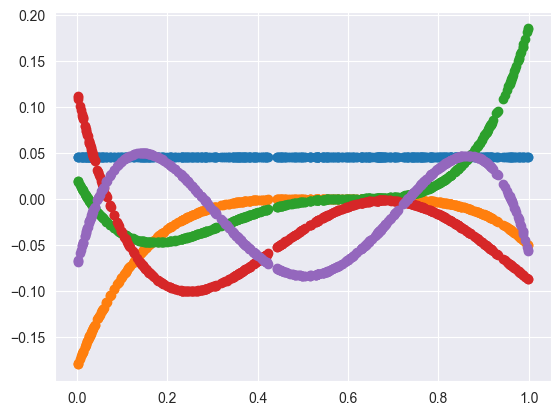

In [82]:
plt.scatter(data_combined[:,0], design[:,0])
plt.scatter(data_combined[:,0], design[:,1])
plt.scatter(data_combined[:,0], design[:,2])
plt.scatter(data_combined[:,0], design[:,3])
plt.scatter(data_combined[:,0], design[:,4])

In [83]:
const = group_lasso.gaussian
coverages, lengths, selected_inter\
    = naive_inference_inter(X=design, Y=Y, groups=groups,
                                   Y_mean=Y_mean, const=const,
                                   n_features=30, 
                                   interactions=data_interaction,
                                   weight_frac=0.5, level=0.9, 
                                   intercept=True, mode='weakhierarchy')

Naive Selection Size: 21


In [84]:
np.mean(coverages)

0.9322493224932249

In [85]:
np.mean(lengths)

78.8487861984194

In [86]:
const = group_lasso.gaussian
coverages, lengths, selected_inter\
    = data_splitting_inter(X=design, Y=Y, groups=groups,
                                                  Y_mean=Y_mean, const=const,
                                                  n_features=30, 
                                                  interactions=data_interaction,
                                                  weight_frac=0.5, level=0.9, 
                                                  intercept=True,
                                                 proportion=0.5,
                                                  mode='weakhierarchy')

DS Selection Size: 39


In [87]:
np.mean(coverages)

0.9143518518518519

In [88]:
np.mean(lengths)

184.99900617415594

## A Small-scale Simulation for Naive and Data Splitting

In [95]:
coverage_naive_l = []
lengths_naive_l = []
coverage_ds_l = []
lengths_ds_l = []
F1_i_naive_l = []
F1_i_ds_l = []
p_nl = 100 # p=100, n=1000, SNR=0.5, rho=0.6, strong vs allpairs gives good results
intercept_flag = True

for i in range(20):
    const = group_lasso.gaussian
    
    while True:  # run until we get some selection
        no_selection = False
        
        (design, data_interaction, Y, Y_mean, data_combined,
        groups, active, active_inter_adj, active_inter_list) \
            = generate_gaussian_instance_nonlinear_interaction(n=1000, p_nl=p_nl,
                                                               p_l=0, s_l=0,
                                                               nknots=6, degree=2,
                                                               SNR=0.5, rho=0.6,
                                                               center=False, scale=False, 
                                                               random_signs=True,
                                                               intercept=intercept_flag, 
                                                       structure='stronghierarchy', 
                                                       s_interaction=10,
                                                       interaction_signal=1)
        
        coverages, lengths, selected_interactions\
            = naive_inference_inter(X=design, Y=Y, groups=groups,
                                                  Y_mean=Y_mean, const=const,
                                                  n_features=p_nl, 
                                                  interactions=data_interaction,
                                                  weight_frac=1.5, level=0.9, 
                                                  intercept=intercept_flag,
                                                  mode='allpairs')
        # Convert the matrix into a list of tuples
        active_inter_set = set([tuple(row) for row in active_inter_list])
        
        if coverages is not None:
            print("DATA SPLITTING")
            coverages_ds, lengths_ds, selected_interactions_ds\
                = data_splitting_inter(X=design, Y=Y, groups=groups,
                                                  Y_mean=Y_mean, const=const,
                                                  n_features=p_nl, 
                                                  interactions=data_interaction,
                                                  weight_frac=1.5, level=0.9, 
                                                  intercept=intercept_flag,
                                                 proportion=0.5,
                                                  mode='allpairs')
            if coverages_ds is not None:
                F1_i = calculate_F1_score_interactions(true_set=active_inter_set,
                                             selected_list=selected_interactions)
                F1_i_ds = calculate_F1_score_interactions(true_set=active_inter_set,
                                              selected_list=selected_interactions_ds)
                coverage_naive_l.append(np.mean(coverages))
                lengths_naive_l.append(np.mean(lengths))
                coverage_ds_l.append(np.mean(coverages_ds))
                lengths_ds_l.append(np.mean(lengths_ds))
                F1_i_naive_l.append(F1_i)
                F1_i_ds_l.append(F1_i_ds)
                break
       

Equally spaced quantile knots used.
noise_sd: 6.160686621838365
main effects: 275.1543170309716
interaction: 86.86309762023338
Naive Selection Size: 817
DATA SPLITTING
DS Selection Size: 929
Equally spaced quantile knots used.
noise_sd: 6.1064189552567605
main effects: 271.03696031313837
interaction: 86.37248149253516
Naive Selection Size: 836
DATA SPLITTING
DS Selection Size: 781
Equally spaced quantile knots used.
noise_sd: 6.156761580646508
main effects: 274.86958654241346
interaction: 86.06936511105
Naive Selection Size: 721
DATA SPLITTING
DS Selection Size: 566
Equally spaced quantile knots used.
noise_sd: 6.102945172957489
main effects: 271.96089435272074
interaction: 85.02758579757321
Naive Selection Size: 808
DATA SPLITTING
DS Selection Size: 764
Equally spaced quantile knots used.
noise_sd: 6.326948450458518
main effects: 274.87537644629526
interaction: 86.27827889744377
Naive Selection Size: 956
DATA SPLITTING
DS Selection Size: 887
Equally spaced quantile knots used.
noise_s

In [96]:
print(np.mean(np.array(coverage_naive_l)))
print(np.mean(np.array(coverage_ds_l)))
print(np.mean(np.array(lengths_naive_l)))
print(np.mean(np.array(lengths_ds_l)))
print(np.mean(np.array(F1_i_naive_l)))
print(np.mean(np.array(F1_i_ds_l)))

0.9092222222222223
0.9101515151515152
3.1819601230232615
4.583567884740714
0.016096962372719868
0.015617356652577402


In [53]:
def interaction_filter_vary_SNR(nsim=100):
    """
    Compare to R randomized lasso
    """

    # Operating characteristics
    oper_char = {}
    oper_char["coverage rate"] = []
    oper_char["avg length"] = []
    oper_char["method"] = []
    oper_char["F1 score interaction"] = []
    oper_char["|G|"] = []
    oper_char["SNR"] = []
    p = 50
    intercept_flag = True

    for SNR in [0.5, 1, 2, 5]:  
        for i in range(nsim):

            inst, const = (generate_gaussian_instance_nonlinear_interaction,
                           group_lasso.gaussian)

            while True:  # run until we get some selection
                (design, data_interaction, Y, Y_mean, data_combined,
                 groups, active, active_inter_adj, active_inter_list) \
                    = inst(n=500, p_nl=p, p_l=0, s_l=0,
                           nknots=6, degree=2, SNR=SNR, rho=0.3,
                           center=False, scale=False, random_signs=True,
                           intercept=intercept_flag, structure='stronghierarchy', 
                           s_interaction=5, interaction_signal=1)

                noselection = False  # flag for a certain method having an empty selected set

                if not noselection:
                    # MLE inference
                    coverages_ds, lengths_ds, selected_interactions_ds \
                        = data_splitting_spline_inter(X=design, Y=Y, groups=groups,
                                                  Y_mean=Y_mean, const=const,
                                                  n_features=p, 
                                                  interactions=data_interaction,
                                                  weight_frac=1.5, level=0.9, 
                                                  intercept=intercept_flag,
                                                 proportion=0.5,
                                                  mode="weakhierarchy")
                    
                    # Convert the matrix into a list of tuples
                    active_inter_set = set([tuple(row) for row in active_inter_list])
                    noselection = (coverages_ds is None)

                if not noselection:
                    coverages, lengths, selected_interactions \
                        = naive_inference_spline_inter(X=design, Y=Y, groups=groups,
                                                  Y_mean=Y_mean, const=const,
                                                  n_features=p, 
                                                  interactions=data_interaction,
                                                  weight_frac=1.5, level=0.9, 
                                                  intercept=intercept_flag,
                                                  mode="weakhierarchy")
                    noselection = (coverages is None)

                if not noselection:
                    F1_i_ds \
                        = calculate_F1_score_interactions(true_set=active_inter_set,
                                            selected_list=selected_interactions_ds)
                    F1_i = calculate_F1_score_interactions(true_set=active_inter_set,
                                            selected_list=selected_interactions)
                    # Naive
                    oper_char["coverage rate"].append(np.mean(coverages))
                    oper_char["avg length"].append(np.mean(lengths))
                    oper_char["F1 score interaction"].append(F1_i)
                    oper_char["method"].append('Naive')
                    oper_char["|G|"].append(len(selected_interactions))
                    oper_char["SNR"].append(SNR)

                    # Data splitting
                    oper_char["coverage rate"].append(np.mean(coverages_ds))
                    oper_char["avg length"].append(np.mean(lengths_ds))
                    oper_char["F1 score interaction"].append(F1_i_ds)
                    oper_char["method"].append('Data Splitting')
                    oper_char["|G|"].append(len(selected_interactions_ds))
                    oper_char["SNR"].append(SNR)

                    break  # Go to next iteration if we have some selection
    return oper_char

In [54]:
oper_char_SNR = interaction_filter_vary_SNR(10)

Equally spaced quantile knots used.
noise_sd: 6.166382596411499
main effects: 191.55853923605926
interaction: 31.018804866475403
X_S rank:  101
X_S dim:  101
Equally spaced quantile knots used.
noise_sd: 6.004702549075693
main effects: 191.65117700258753
interaction: 30.83561453822203
X_S rank:  101
X_S dim:  101
Equally spaced quantile knots used.
noise_sd: 6.371792573529182
main effects: 198.79741258727992
interaction: 32.618808219434975
X_S rank:  101
X_S dim:  101
Equally spaced quantile knots used.
noise_sd: 6.105685930965536
main effects: 187.40998891660107
interaction: 31.015992539999697
X_S rank:  101
X_S dim:  101
Equally spaced quantile knots used.
noise_sd: 6.224032121324886
main effects: 191.94558880737867
interaction: 31.100408003064366
X_S rank:  101
X_S dim:  101
Equally spaced quantile knots used.
noise_sd: 5.835772796797324
main effects: 185.59496606257477
interaction: 30.33483234861348
X_S rank:  101
X_S dim:  101
Equally spaced quantile knots used.
noise_sd: 6.069972

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
def plotting(oper_char_df, x_axis='p', hue='method'):
    oper_char_df_copy = oper_char_df.copy()
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(10,6))

    #print("Mean coverage rate/length:")
    #print(oper_char_df.groupby([x_axis, hue]).mean())
    my_palette = {"Proposed": "#48c072", 
                  "Naive": "#fc5a50",
                  "Data Splitting": "#03719c"}
    
    alias = {"stronghierarchy": "Strong", 
             "weakhierarchy": "Weak", 
             "allpairs": "All"}
    if x_axis == 'mode':
        oper_char_df_copy['mode'] = oper_char_df_copy['mode'].map(alias)

    cov_plot = sns.boxplot(y=oper_char_df_copy["coverage rate"],
                           x=oper_char_df_copy[x_axis],
                           hue=oper_char_df_copy[hue],
                           palette=my_palette,
                           orient="v", ax=ax1,
                           showmeans=True,
                           linewidth=1)
    cov_plot.set(title='Coverage')
    cov_plot.set_ylim(0., 1.05)
    #plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
    #ax1.set_ylabel("")  # remove y label, but keep ticks
    ax1.set_xlabel(x_axis)

    len_plot = sns.boxplot(y=oper_char_df_copy["avg length"],
                           x=oper_char_df_copy[x_axis],
                           hue=oper_char_df_copy[hue],
                           palette=my_palette,
                           orient="v", ax=ax2,
                           linewidth=1)
    len_plot.set(title='Length')
    # len_plot.set_ylim(0, 100)
    # len_plot.set_ylim(3.5, 7.8)
    # plt.tight_layout()
    # ax2.set_ylabel("")  # remove y label, but keep ticks
    ax2.set_xlabel(x_axis)

    handles, labels = ax2.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    fig.subplots_adjust(bottom=0.15)
    fig.legend(handles, labels, loc='lower center', ncol=4)
    

    F1_plot = sns.boxplot(y=oper_char_df_copy["F1 score interaction"],
                          x=oper_char_df_copy[x_axis],
                          hue=oper_char_df_copy[hue],
                          palette=my_palette,
                          orient="v", ax=ax3,
                          linewidth=1)
    F1_plot.set(title='F1 score')
    ax3.set_xlabel(x_axis)
    
    size_plot = sns.boxplot(y=oper_char_df_copy["|G|"],
                          x=oper_char_df_copy[x_axis],
                          hue=oper_char_df_copy[hue],
                          palette=my_palette,
                          orient="v", ax=ax4,
                          linewidth=1)
    size_plot.set(title='|G|')
    ax4.set_xlabel(x_axis)

    cov_plot.legend_.remove()
    len_plot.legend_.remove()
    F1_plot.legend_.remove()
    size_plot.legend_.remove()

    #plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.6, hspace=0.5)
    plt.show()

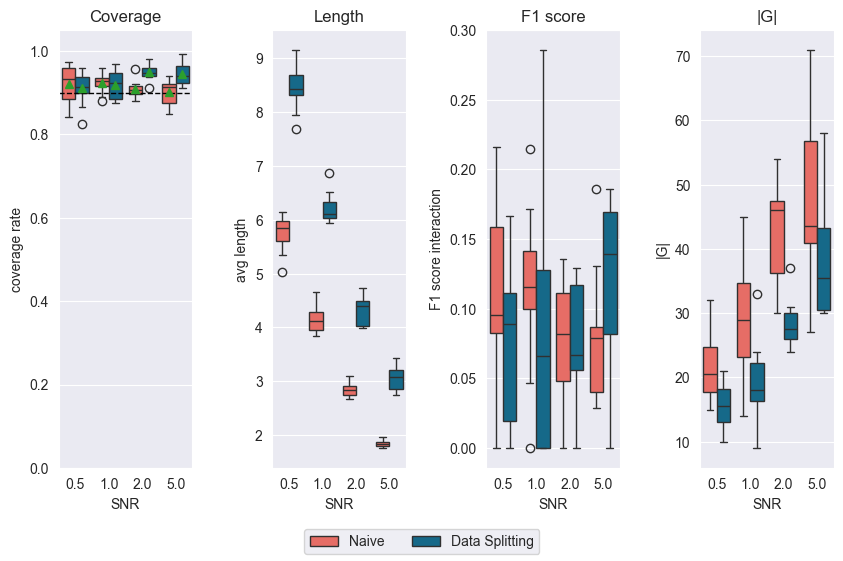

In [56]:
plotting(oper_char_df=pd.DataFrame(oper_char_SNR),
         x_axis="SNR",
         hue="method")

In [58]:
def interaction_filter_vary_mode(nsim=100):
    """
    Compare to R randomized lasso
    """

    # Operating characteristics
    oper_char = {}
    oper_char["coverage rate"] = []
    oper_char["avg length"] = []
    oper_char["method"] = []
    oper_char["F1 score interaction"] = []
    oper_char["|G|"] = []
    oper_char["mode"] = []
    p = 100
    intercept_flag = True

    for mode in ["stronghierarchy", "weakhierarchy", "allpairs"]:  
        for i in range(nsim):

            inst, const = (generate_gaussian_instance_nonlinear_interaction,
                           group_lasso.gaussian)

            while True:  # run until we get some selection
                (design, data_interaction, Y, Y_mean, data_combined,
                 groups, active, active_inter_adj, active_inter_list) \
                    = inst(n=1000, p_nl=p, p_l=0, s_l=0,
                           nknots=6, degree=2, SNR=1, rho=0.6,
                           center=False, scale=False, random_signs=True,
                           intercept=intercept_flag, structure='stronghierarchy', 
                           s_interaction=10, interaction_signal=5)

                noselection = False  # flag for a certain method having an empty selected set

                if not noselection:
                    # MLE inference
                    coverages_ds, lengths_ds, selected_interactions_ds \
                        = data_splitting_spline_inter(X=design, Y=Y, groups=groups,
                                                  Y_mean=Y_mean, const=const,
                                                  n_features=p, 
                                                  interactions=data_interaction,
                                                  weight_frac=1., level=0.9, 
                                                  intercept=intercept_flag,
                                                 proportion=0.5,
                                                  mode=mode)
                    
                    # Convert the matrix into a list of tuples
                    active_inter_set = set([tuple(row) for row in active_inter_list])
                    noselection = (coverages_ds is None)

                if not noselection:
                    coverages, lengths, selected_interactions \
                        = naive_inference_spline_inter(X=design, Y=Y, groups=groups,
                                                  Y_mean=Y_mean, const=const,
                                                  n_features=p, 
                                                  interactions=data_interaction,
                                                  weight_frac=1., level=0.9, 
                                                  intercept=intercept_flag,
                                                  mode=mode)
                    noselection = (coverages is None)

                if not noselection:
                    F1_i_ds \
                        = calculate_F1_score_interactions(true_set=active_inter_set,
                                            selected_list=selected_interactions_ds)
                    F1_i = calculate_F1_score_interactions(true_set=active_inter_set,
                                            selected_list=selected_interactions)
                    # Naive
                    oper_char["coverage rate"].append(np.mean(coverages))
                    oper_char["avg length"].append(np.mean(lengths))
                    oper_char["F1 score interaction"].append(F1_i)
                    oper_char["method"].append('Naive')
                    oper_char["|G|"].append(len(selected_interactions))
                    oper_char["mode"].append(mode)

                    # Data splitting
                    oper_char["coverage rate"].append(np.mean(coverages_ds))
                    oper_char["avg length"].append(np.mean(lengths_ds))
                    oper_char["F1 score interaction"].append(F1_i_ds)
                    oper_char["method"].append('Data Splitting')
                    oper_char["|G|"].append(len(selected_interactions_ds))
                    oper_char["mode"].append(mode)

                    break  # Go to next iteration if we have some selection
    return oper_char

In [60]:
oper_char_mode = interaction_filter_vary_mode(20)

Equally spaced quantile knots used.
noise_sd: 6.81319170354932
main effects: 278.4747492698518
interaction: 432.4963142450631
X_S rank:  201
X_S dim:  201
DS Selection Size: 0
Naive Selection Size: 7
Equally spaced quantile knots used.
noise_sd: 6.6694526812794575
main effects: 275.4977918860102
interaction: 416.6107257268499
X_S rank:  201
X_S dim:  201
DS Selection Size: 1
Naive Selection Size: 6
Equally spaced quantile knots used.
noise_sd: 7.523841718254869
main effects: 270.1630481306926
interaction: 423.7745959109811
X_S rank:  201
X_S dim:  201
DS Selection Size: 0
Naive Selection Size: 11
Equally spaced quantile knots used.
noise_sd: 7.25453581058312
main effects: 277.2051000559292
interaction: 432.14619834888344
X_S rank:  201
X_S dim:  201
DS Selection Size: 1
Naive Selection Size: 6
Equally spaced quantile knots used.
noise_sd: 7.629245919730272
main effects: 263.4500657590371
interaction: 432.3916416769551
X_S rank:  201
X_S dim:  201
DS Selection Size: 1
Naive Selection Si

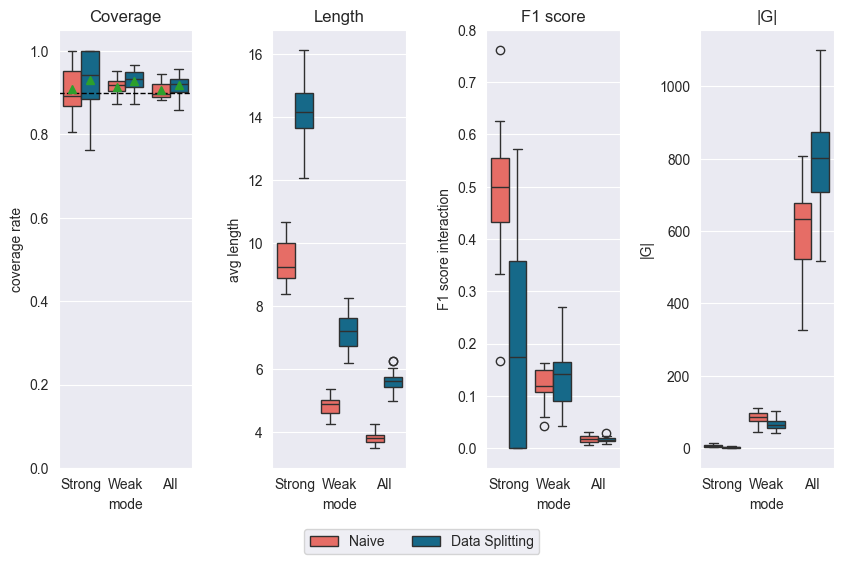

In [61]:
plotting(oper_char_df=pd.DataFrame(oper_char_mode),
         x_axis="mode",
         hue="method")